In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

In [10]:
timeline_df = pd.read_csv('../data/covid_data/CovidFaelle_Timeline.csv', delimiter=';')


In [11]:
timeline_df['Time'] = timeline_df['Time'].str.slice(start=0, stop=10)
timeline_df['Time'] = pd.to_datetime(timeline_df['Time'])

/home/andeol/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '26.02.2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/home/andeol/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '27.02.2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/home/andeol/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '28.02.2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/home/andeol/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '29.02.2020' in DD/MM/YYYY 

In [12]:
timeline_df = timeline_df[(timeline_df['Bundesland']=='Österreich')]

In [13]:
timeline_df = timeline_df.groupby([pd.Grouper(key='Time', freq='M')])['AnzahlFaelle'].sum().reset_index().sort_values('Time')


In [14]:
timeline_df = timeline_df.set_index(['Time'])

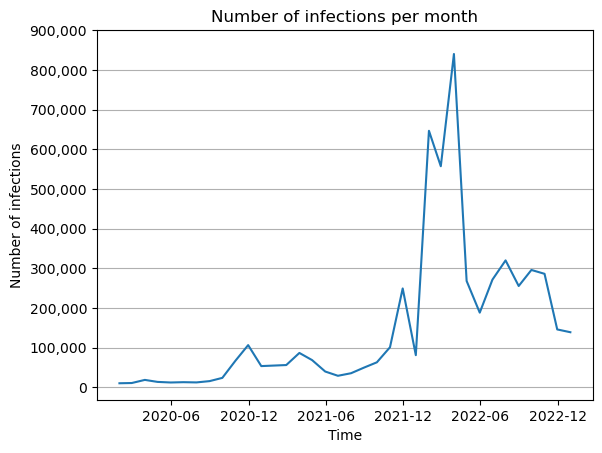

In [16]:
fig = plt.figure()
ax_time = fig.add_subplot(111)

plt.plot(timeline_df['AnzahlFaelle'])

plt.yticks(np.arange(0, 900001, 100000))

ax_time.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(12, 6)))
ax_time.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.ylabel('Number of infections')
plt.xlabel('Time')

plt.title(f"Number of infections per month")

plt.grid(axis='y')

plt.savefig('plot_white_hat_andeol.png', dpi=1200, format='png', bbox_inches='tight')

plt.show()